# 📏 Height Prediction from Weight using Simple Linear Regression

# STEP 1: Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# STEP 2: Load the Dataset

In [5]:
df = pd.read_excel('dataset.xlsx')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


# STEP 3: Visualize the Relationship

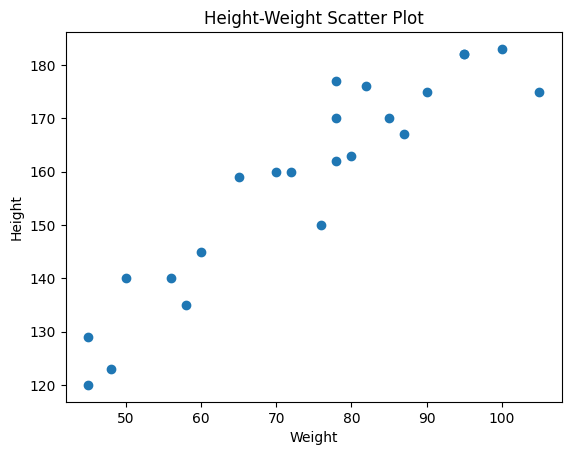

In [4]:
## Scatter plot
plt.scatter(df['Weight'], df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Height-Weight Scatter Plot")
plt.show()

As the weight is increasing, Height is also increasing so this is a kind of linear relationship

If you really want to find out that if this relationship is positive or negative, then you can use correlation
# Correlation to check strength of relation

In [5]:
#Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


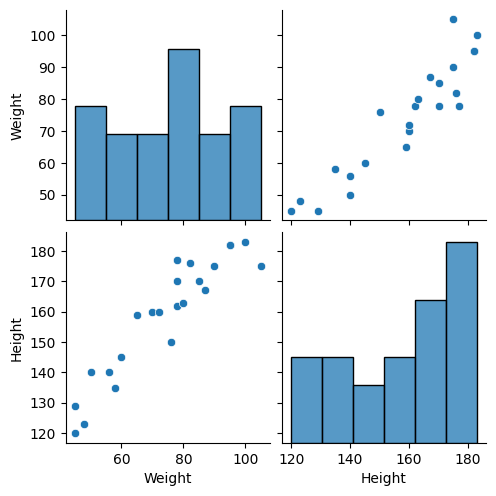

In [6]:
##Seaborn pairplot for visualization
import seaborn as sns
sns.pairplot(df)

In [7]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


# STEP 4: Define Dependent and Independent Variables

so we have to divide the dataset into dependent and independent feature/s. As per naming conventions, X for Independent and Y for dependent

In [6]:
# Dependent and Independent Features
X = df[['Weight']] # Here if we use only 1 square bracket then it is a series and 2 brackets then it will be convert into dataframe
X # Always make sure that your independent features are in the form of dataframe or 2-D array
y = df['Height']
y
type(y)

pandas.core.series.Series

This is a regression problem statement as the output value is continuous

#  STEP 5: Train-Test Split

In [7]:
## Train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [8]:
X_train.shape

(17, 1)

#  STEP 6: Standardize the Data

In [9]:
#Standarization - mean = 0 , std = 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

we dont use fit_transform in test dataset, we use only transform,, so that to use training dataset mean and use it in test dataset. Data leakage is possible. I dont want my testing data to look for training data to avoid data leakage.

In [10]:
X_test = scaler.transform(X_test)
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

#  STEP 7: Train Linear Regression Model

In [11]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression(n_jobs = -1)

In [12]:
regression.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [13]:
# Coefficients
print(regression.coef_)
print(regression.intercept_)

[17.2982057]
156.47058823529412


# STEP 8: Visualize the Regression Line

/tmp/ipython-input-15-585919821.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


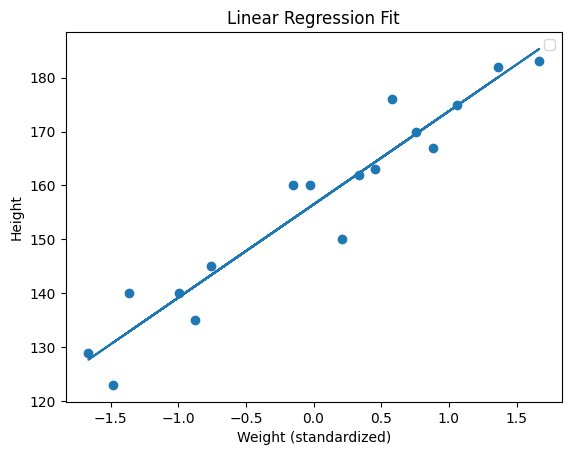

In [15]:
plt.scatter(X_train, y_train)
plt.xlabel("Weight (standardized)")
plt.ylabel("Height")
plt.title("Linear Regression Fit")
plt.plot(X_train,regression.predict(X_train))
plt.legend()
plt.show()

# STEP 9: Predictions & Performance

In [16]:
##Prediction for test data now
y_pred = regression.predict(X_test)

In [17]:
## Performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [18]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605


R² = 1.0 → 💯 PERFECT. No mistake. Rare in real life.

R² ≥ 0.90 → 🟢 Excellent model

R² between 0.75 – 0.89 → 🟡 Good model, may improve more

R² between 0.5 – 0.74 → 🟠 Medium accuracy. Not reliable for real-world use yet

R² < 0.5 → 🔴 Poor model. Not learning well. Needs fixing.

In [19]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)

0.7360826717981276


In [20]:
#Display adjusted R-Squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6701033397476595

# STEP 10: OLS Model with Statsmodels (Optional)

In [21]:
#OLS Linear Regression
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()

In [22]:
prediction = model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [23]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Sat, 12 Jul 2025   Prob (F-statistic):                       0.664
Time:                        22:42:16   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


# STEP 11: Prediction on New Data
Scaling transformation step is have to be done always !!

In [29]:
## Prediction for new data
new_weight = 72
predicted_height = regression.predict(scaler.transform([[new_weight]]))
print(f"Predicted height for weight {new_weight}kg: {predicted_height[0]:.2f} cm")

Predicted height for weight 72kg: 155.98 cm


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
